**Simple Linear Regression**

In [40]:
#Step 1.Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 

In [9]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [10]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [12]:
#Step 3:Create a linear regression model
model=LinearRegression() #initialize the model

In [16]:
#Step 4:Train the model using the dataset
model.fit(X,Y)#This model learns the best_fit line by minimizing the error

LinearRegression()

In [24]:
#Step 5:Coefficient and Intercept
print("Slope:",model.coef_[0]) #coefficient(slope) of regression line
print("Intercept:",model.intercept_)#Intercept of regression line
m=model.coef_[0]
c=model.intercept_

Slope: 4.965498141580591
Intercept: 27.430065779800536


In [25]:
#Step 6: Display the equation of the line
print(f"Equation of the line:Y={m:.2f}X+{c:.2f}")

Equation of the line:Y=4.97X+27.43


In [27]:
#Step 7:Predict values using the model
Y_pred=model.predict(X) #Predict salaries for the given experience values

**Model Evaluation Metrics**

In [28]:
#1.Mean Square Erro(MSE)-Measures average squared difference between actual and predicted values
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE):{mse:.2f}")

Mean Squared Error(MSE):11.75


In [29]:
#2.Mean Absolute Erro(MAE)-Measures average absolute difference between actual and predicted values
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE):{mae:.2f}")

Mean Absolute Error(MAE):2.87


In [30]:
#3.Root Mean Square Error(RMSE)-Measures standard deviation of residuals(errors)
rmse=np.sqrt(mse)
print(f"Root Mean Square Error (RMSE):{rmse:.2f}")

Root Mean Square Error (RMSE):3.43


In [32]:
#4.R-squared-Represents how well the model fits the data(0 to 1,where 1 is the best)
r2=r2_score(Y,Y_pred)
print(f"R-squared:{r2:.2f}")

R-squared:0.95


In [33]:
#5.Adjusted R-square(R2_adj)-Adjusted for the number of predictors,better for multiple regression
n=len(Y)#Number of observations
p=1 #Number of independent variables(Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


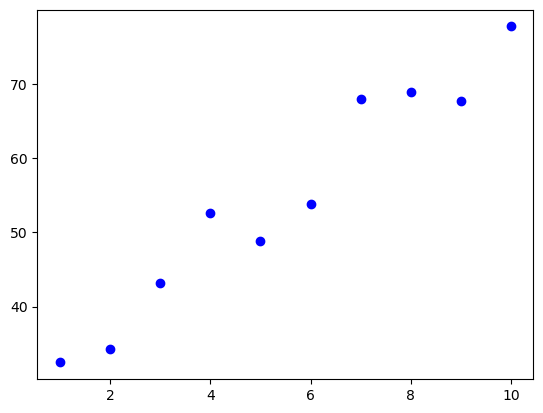

In [34]:
#Step 8:Plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data') #Scatter plot of actual values

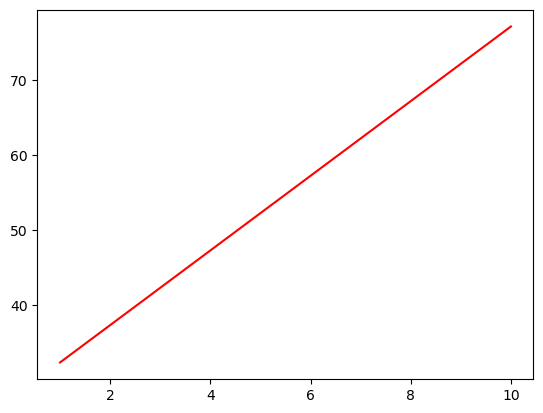

In [35]:
#Step 9:Plot the Regression line(Best Fit Line)
plt.plot(X,Y_pred,color='red',label='Best Fit Line') #Regression Line

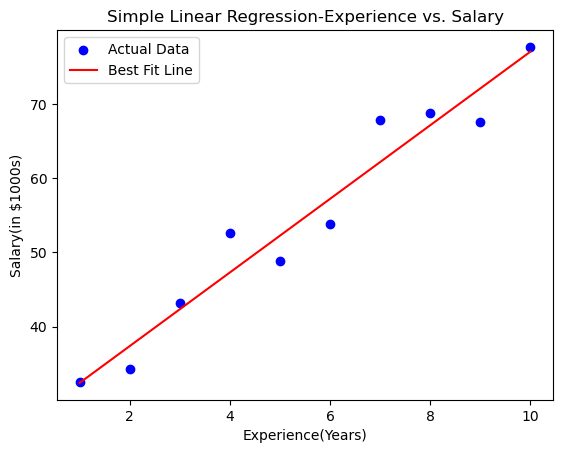

In [37]:
plt.scatter(X,Y,color='blue',label='Actual Data')#Scatter plot of actual values
plt.plot(X,Y_pred,color='red',label='Best Fit Line')#RegressionLine
#step 10:Add labels and Legend
plt.xlabel('Experience(Years)')#Label for x-axis
plt.ylabel('Salary(in $1000s)')#Label for y-axis
plt.title('Simple Linear Regression-Experience vs. Salary')#title of the plot
plt.legend() #show legend
#Step 11:Display the graph
plt.show()

**Prediction**

In [38]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp=float(input("\nEnter years of experience to predict salray (or -1 to exit):"))
        if exp==-1:
            break #Exit the Loop
        predicted_sal=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years experience:${predicted_sal:.2f}K")
    except ValueError:
        print("Please enter a valid number")
    


Enter years of experience to predict salray (or -1 to exit):3
Predicted Salary for 3.0 years experience:$42.33K

Enter years of experience to predict salray (or -1 to exit):5
Predicted Salary for 5.0 years experience:$52.26K

Enter years of experience to predict salray (or -1 to exit):0
Predicted Salary for 0.0 years experience:$27.43K

Enter years of experience to predict salray (or -1 to exit):-1


**OLS**

In [41]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [42]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:20   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
